In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# x**3 + x**2 - x - 0.5
err = 10**-7

## Решение нелинейных уравнений

In [3]:
def f(x):
    return x**3 + x**2 - x - 0.5

In [4]:
def diff(f, x):
    dx = 10**-4
    return (f(x + dx) - f(x)) / (dx)

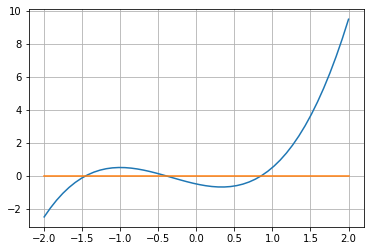

In [5]:
x = np.linspace(-2,2)
plt.plot(x, [f(z) for z in x], label='f(x)')
plt.plot(x, [0] * 50)
plt.grid()

### понимаем что корень больше нуля в пределах 0.5 и 1
## Метод простых итераций

In [6]:
def solve_simple_iter(f, a, b, err):
    step, q, alpha = 0.1, [], diff(f, (a + b) / 2)
    # создание новой функции
    fi = lambda x: x - (1/alpha)*f(x)
    # создание производной новой функции
    diffi = lambda x: (x-(1/alpha)*fi(x + err) - (x-(1/alpha)*fi(x))) / err
    # проверка на сжимающую функицю и нахождение q через максимальную производную
    x = a + err
    while x < b:
        q.append(abs(diffi(x)))
        if fi(x) <= a or fi(x) >= b:
            print("fi(x) not in [a,b] : Error")
            exit()
        elif abs(diffi(x)) > 1:
            print("det fi(x) > 1 : Error")
            exit()
        x += step # check step
    q, x, num_of_it = max(q), (a + b) / 2, 0
    while True:
        x_ = fi(x)
        num_of_it += 1
        if abs(x - x_) * q / (1 - q) < err:
            return x_, f(x_), num_of_it
        x = x_

In [7]:
solve_simple_iter(f, 0.5, 1, err)

(0.8546377050834388, 7.357091758031231e-08, 13)

## Метод Ньютона
если брать а = 0.5 не выполняется второе условие

In [8]:
def solve_Newton(f, a, b, err):
    x, num_of_it = (a + b) / 2, 0
    # первая производная
    dif = lambda x: (f(x + err) - f(x)) / err
    # вторая производная
    diff = lambda x: (dif(x + err) - dif(x)) / err
    if f(a) * f(b) >= 0:
        print('f(a)f(b) >= 0 : Error')
        exit()
    if f(x) * diff(x) <= 0:
        print(f(x) * diff(x))
        print("f(x)f''(x) <= 0")
        exit()

    while True:
        x_ = x - f(x) / dif(x)
        num_of_it += 1
        if abs(x - x_) < err:
            return x_, f(x_), num_of_it
        x = x_

In [9]:
solve_Newton(f, 0.75, 1, err)

(0.8546376797184615, 3.3306690738754696e-16, 4)